In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import os
for dirname, _, filenames in os.walk('../DataSets/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

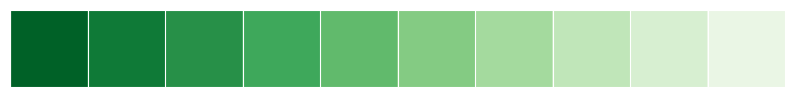

In [2]:
color = sns.palplot(sns.color_palette("Greens_r", 10))

In [3]:
data = pd.read_csv('DataSets/EDA Sberbank Open Data/df.csv', index_col = 'region', parse_dates = True)
data.head()

,name,date,value
region,,,
Russia,The number of applications for consumer loans,2013-01-15,571147
Russia,The number of applications for consumer loans,2013-02-15,504508
Russia,The number of applications for consumer loans,2013-03-15,628803
Russia,The number of applications for consumer loans,2013-04-15,836054
Russia,The number of applications for consumer loans,2013-05-15,867235


In [4]:
data = data.pivot_table(index = ["region", "date"], columns = "name", values = "value", aggfunc = "mean", fill_value = 0).reset_index()
data.head()

name,region,date,Average Fast Food format Check,Average amount of new deposit,Average check in Restaurant format,Average consumer loan application,Average pension,Average salary,Average spending in a fast food restaurant,Average spending in a restaurant,Average spending on cards,Number of new deposits,On average rubles on current account per person,"On average, deposits in rubles per person",The average amount of a mortgage application,The number of applications for consumer loans,The number of applications for mortgages
0,Altai region,2013-01-15,0,0,0,133509,0,0,0,0,0,0,0,0,968154,13423,508
1,Altai region,2013-02-15,0,0,0,150030,0,0,0,0,0,0,0,0,957201,12440,641
2,Altai region,2013-03-15,0,0,0,151795,0,0,0,0,0,0,0,0,974481,15906,853
3,Altai region,2013-04-15,0,0,0,148752,0,0,0,0,0,0,0,0,985195,22172,1072
4,Altai region,2013-05-15,0,0,0,150903,0,0,0,0,0,0,0,0,955750,22642,807


In [5]:
data.drop(data[data['region'] == 'Russia'].index, inplace = True)

data.shape

(6059, 17)

In [6]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data.drop(['date'], axis = 1, inplace = True)
data.head()

name,region,Average Fast Food format Check,Average amount of new deposit,Average check in Restaurant format,Average consumer loan application,Average pension,Average salary,Average spending in a fast food restaurant,Average spending in a restaurant,Average spending on cards,Number of new deposits,On average rubles on current account per person,"On average, deposits in rubles per person",The average amount of a mortgage application,The number of applications for consumer loans,The number of applications for mortgages,year,month
0,Altai region,0,0,0,133509,0,0,0,0,0,0,0,0,968154,13423,508,2013,1
1,Altai region,0,0,0,150030,0,0,0,0,0,0,0,0,957201,12440,641,2013,2
2,Altai region,0,0,0,151795,0,0,0,0,0,0,0,0,974481,15906,853,2013,3
3,Altai region,0,0,0,148752,0,0,0,0,0,0,0,0,985195,22172,1072,2013,4
4,Altai region,0,0,0,150903,0,0,0,0,0,0,0,0,955750,22642,807,2013,5


In [7]:
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [8]:
data[data['year'] == 2013].describe()

name,Average Fast Food format Check,Average amount of new deposit,Average check in Restaurant format,Average consumer loan application,Average pension,Average salary,Average spending in a fast food restaurant,Average spending in a restaurant,Average spending on cards,Number of new deposits,On average rubles on current account per person,"On average, deposits in rubles per person",The average amount of a mortgage application,The number of applications for consumer loans,The number of applications for mortgages,year,month
count,996.0,996.0,996.0,996.000000,996.0,996.0,996.0,996.0,996.0,996.0,996.0,996.0,9.960000e+02,996.000000,996.000000,996.0,996.000000
mean,0.0,0.0,0.0,224808.561245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.425332e+06,9920.750000,841.270080,2013.0,6.500000
std,0.0,0.0,0.0,72484.722075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.656021e+05,8976.078329,951.508404,0.0,3.453787
min,0.0,0.0,0.0,122535.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.971310e+05,1.000000,1.000000,2013.0,1.000000
25%,0.0,0.0,0.0,179622.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.122822e+06,3886.250000,232.250000,2013.0,3.750000
50%,0.0,0.0,0.0,202669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.279771e+06,7219.000000,570.000000,2013.0,6.500000
75%,0.0,0.0,0.0,241233.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.544942e+06,13264.750000,1079.250000,2013.0,9.250000
max,0.0,0.0,0.0,875000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.600000e+06,60630.000000,7753.000000,2013.0,12.000000


In [9]:
data[data['year'] == 2019].describe()

name,Average Fast Food format Check,Average amount of new deposit,Average check in Restaurant format,Average consumer loan application,Average pension,Average salary,Average spending in a fast food restaurant,Average spending in a restaurant,Average spending on cards,Number of new deposits,On average rubles on current account per person,"On average, deposits in rubles per person",The average amount of a mortgage application,The number of applications for consumer loans,The number of applications for mortgages,year,month
count,83.0,83.0,83.0,83.000000,83.000000,83.000000,83.0,83.0,83.000000,83.0,83.000000,8.300000e+01,8.300000e+01,83.000000,83.000000,83.0,83.0
mean,0.0,0.0,0.0,288560.012048,14187.879518,26444.650602,0.0,0.0,10749.397590,0.0,22507.867470,4.960889e+05,1.797274e+06,6604.144578,1138.578313,2019.0,1.0
std,0.0,0.0,0.0,79291.155269,8851.418280,10456.041388,0.0,0.0,4211.628907,0.0,11088.915276,2.522360e+05,5.289034e+05,12927.773798,1337.753661,0.0,0.0
min,0.0,0.0,0.0,196994.000000,5867.000000,16637.000000,0.0,0.0,3296.000000,0.0,10651.000000,3.024180e+05,1.267098e+06,113.000000,5.000000,2019.0,1.0
25%,0.0,0.0,0.0,236999.500000,11379.000000,19809.500000,0.0,0.0,8236.500000,0.0,16024.500000,3.665070e+05,1.449238e+06,2284.500000,420.000000,2019.0,1.0
50%,0.0,0.0,0.0,267447.000000,12834.000000,23380.000000,0.0,0.0,9662.000000,0.0,19483.000000,4.314370e+05,1.652113e+06,3805.000000,749.000000,2019.0,1.0
75%,0.0,0.0,0.0,314017.500000,14420.000000,28159.000000,0.0,0.0,11731.000000,0.0,23118.500000,5.062730e+05,1.923472e+06,6508.500000,1377.000000,2019.0,1.0
max,0.0,0.0,0.0,638968.000000,88132.000000,64334.000000,0.0,0.0,23440.000000,0.0,70892.000000,1.928839e+06,4.487028e+06,102535.000000,8367.000000,2019.0,1.0


In [10]:
data.drop(data[data['year'] == 2013].index, inplace = True)
data.drop(data[data['year'] == 2019].index, inplace = True)

data.shape

(4980, 18)

In [11]:
expenses = data[['region', 'month', 'year', 'Average spending in a fast food restaurant', 'Average spending in a restaurant',
                 'Average Fast Food format Check', 'Average check in Restaurant format', 'Average spending on cards']]
expenses = expenses.rename(columns = {'Average spending in a fast food restaurant': 'aver_fastfood', 'Average spending in a restaurant': 'aver_rest',
                                      'Average Fast Food format Check': 'aver_check_fastfood', 'Average check in Restaurant format': 'aver_check_rest',
                                      'Average spending on cards': 'aver_cards'})
expenses.head()

name,region,month,year,aver_fastfood,aver_rest,aver_check_fastfood,aver_check_rest,aver_cards
12,Altai region,1,2014,0,0,0,0,4569
13,Altai region,2,2014,0,0,0,0,4242
14,Altai region,3,2014,0,0,0,0,5043
15,Altai region,4,2014,0,0,0,0,4719
16,Altai region,5,2014,0,0,0,0,4962


In [12]:
income_savings = data[['region', 'month', 'year', 'Average salary', 'Average pension', 'On average rubles on current account per person',
                       'On average, deposits in rubles per person']]
income_savings = income_savings.rename(columns = {'Average salary': 'aver_salary', 'Average pension': 'aver_pension',
                                                  'On average rubles on current account per person': 'aver_curacc_perpers',
                                                  'On average, deposits in rubles per person': 'aver_deposits_perpers'})
income_savings.head()

name,region,month,year,aver_salary,aver_pension,aver_curacc_perpers,aver_deposits_perpers
12,Altai region,1,2014,0,10557,11409,184588
13,Altai region,2,2014,0,10417,11737,184530
14,Altai region,3,2014,0,10473,11805,184391
15,Altai region,4,2014,0,11861,12335,186756
16,Altai region,5,2014,0,10092,12321,192086


In [13]:
bank_operations = data[['region', 'month', 'year', 'The number of applications for consumer loans', 'Average consumer loan application',
                        'The number of applications for mortgages', 'The average amount of a mortgage application',
                        'Number of new deposits', 'Average amount of new deposit']]
bank_operations = bank_operations.rename(columns = {'The number of applications for consumer loans': 'num_loan_applic',
                                                    'Average consumer loan application': 'aver_loan_applic',
                                                    'The number of applications for mortgages': 'num_mortgag_applic',
                                                    'The average amount of a mortgage application': 'aver_mortgag_applic',
                                                    'Number of new deposits': 'num_new_depos',
                                                    'Average amount of new deposit': 'aver_new_depos'})
bank_operations.head()

name,region,month,year,num_loan_applic,aver_loan_applic,num_mortgag_applic,aver_mortgag_applic,num_new_depos,aver_new_depos
12,Altai region,1,2014,11372,146725,1015,1154545,27814,126667
13,Altai region,2,2014,17683,153556,1452,1159874,28979,119293
14,Altai region,3,2014,18359,155531,1691,1101878,28939,122413
15,Altai region,4,2014,24797,144707,1709,1157110,27852,125664
16,Altai region,5,2014,22465,150149,1562,1089882,24941,140833


### Визуализация данных

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


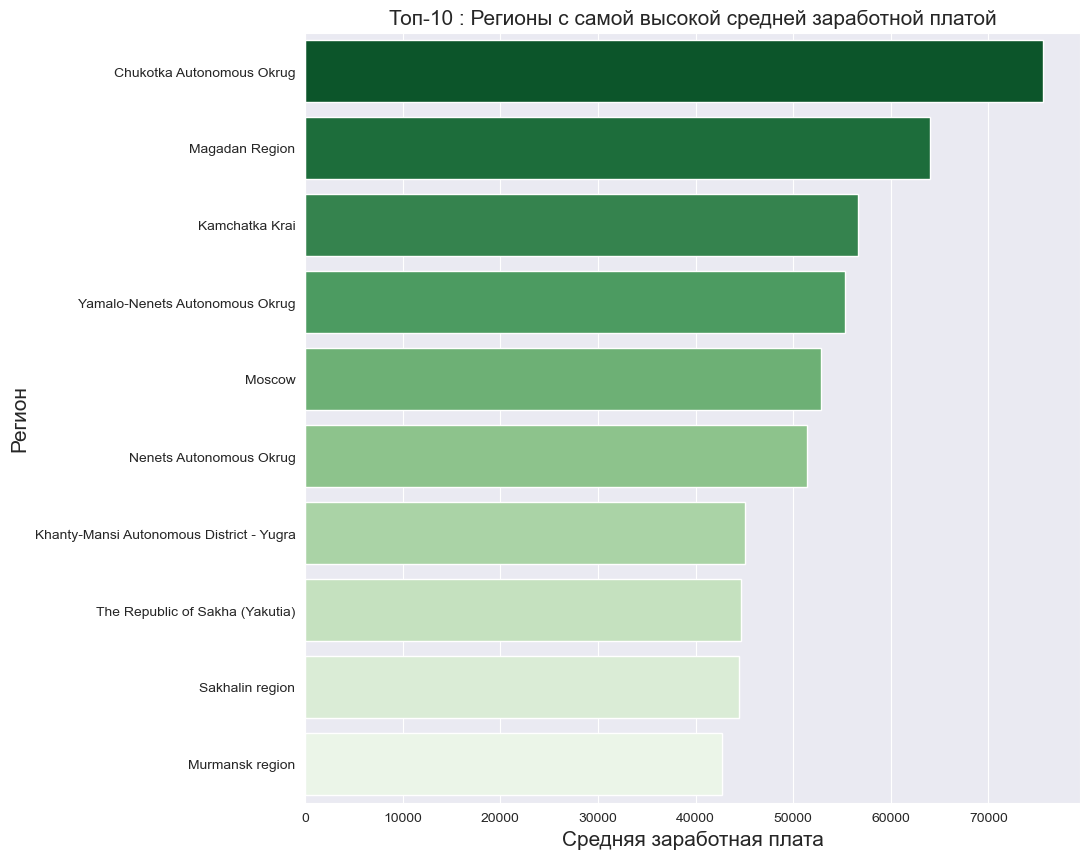

In [14]:
region_val = income_savings.groupby("region")["aver_salary"].agg(np.median).sort_values(ascending=False)[:10].to_frame()
box = sns.barplot(region_val["aver_salary"], region_val.index, palette = "Greens_r")

plt.title('Топ-10 : Регионы с самой высокой средней заработной платой', fontsize = 15)
plt.xlabel('Средняя заработная плата', fontsize = 15)
plt.ylabel('Регион', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show();

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


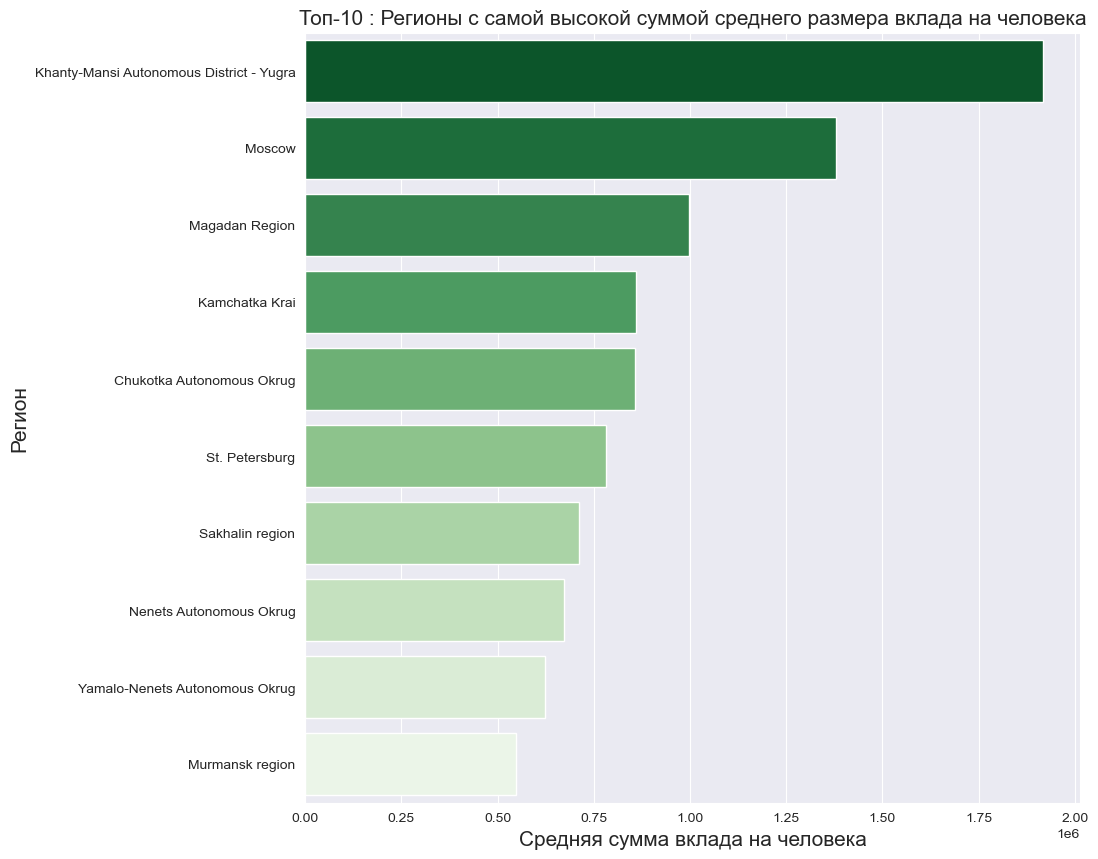

In [15]:
region_val = income_savings.groupby("region")["aver_deposits_perpers"].agg(np.median).sort_values(ascending=False)[:10].to_frame()
box = sns.barplot(region_val["aver_deposits_perpers"], region_val.index, palette = 'Greens_r')

plt.title('Топ-10 : Регионы с самой высокой суммой среднего размера вклада на человека', fontsize = 15)
plt.xlabel('Средняя сумма вклада на человека', fontsize = 15)
plt.ylabel('Регион', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show();

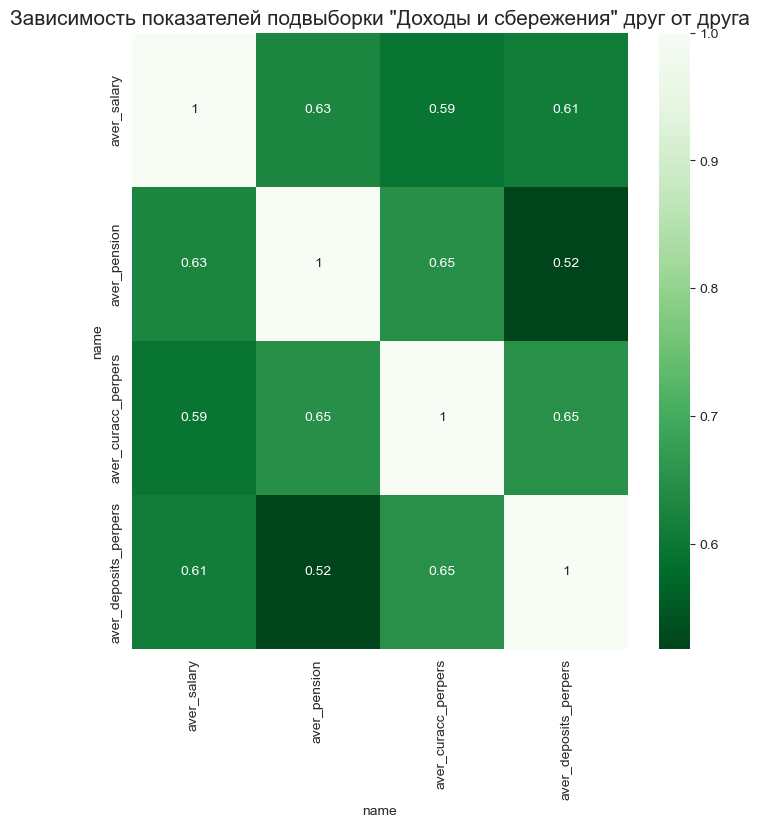

In [22]:
plt.figure(figsize = (8, 8));
plt.title('Зависимость показателей подвыборки "Доходы и сбережения" друг от друга', fontsize = 15)
sns.heatmap(income_savings[['aver_salary', 'aver_pension', 'aver_curacc_perpers', 'aver_deposits_perpers']].corr(), annot = True, cmap = "Greens_r");

In [26]:
new_bankoper = bank_operations.columns.drop(['region', 'year', 'month', 'num_new_depos', 'aver_new_depos', 'aver_loan_applic', 'aver_mortgag_applic'])
len(new_bankoper)

2

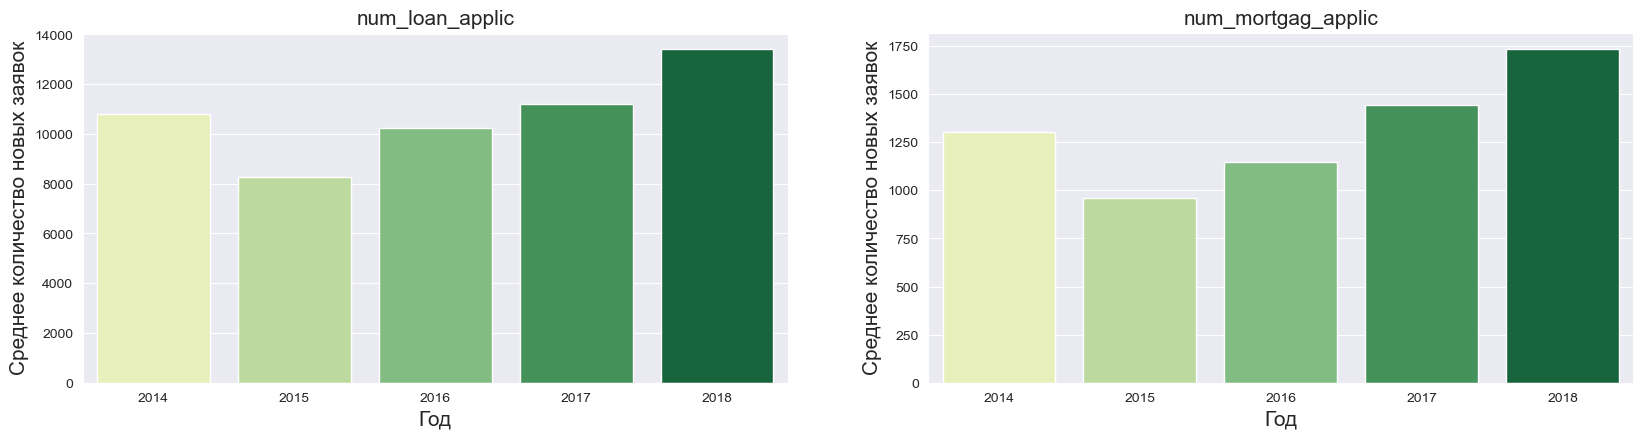

In [29]:
for i, j in itertools.zip_longest(new_bankoper, range(len(new_bankoper))):
    plt.subplot((len(new_bankoper)), 2, j + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

    a = bank_operations.groupby(['year'])[i].agg(np.mean).to_frame().reset_index()
    sns.barplot(y = a[i], x = a['year'], palette = 'YlGn') # Greens, summer
    plt.title(i, fontsize = 15)
    plt.xlabel('Год', fontsize = 15)
    plt.ylabel('Среднее количество новых заявок', fontsize = 15)
    fig = plt.gcf()
    fig.set_size_inches(20,10)

plt.show()

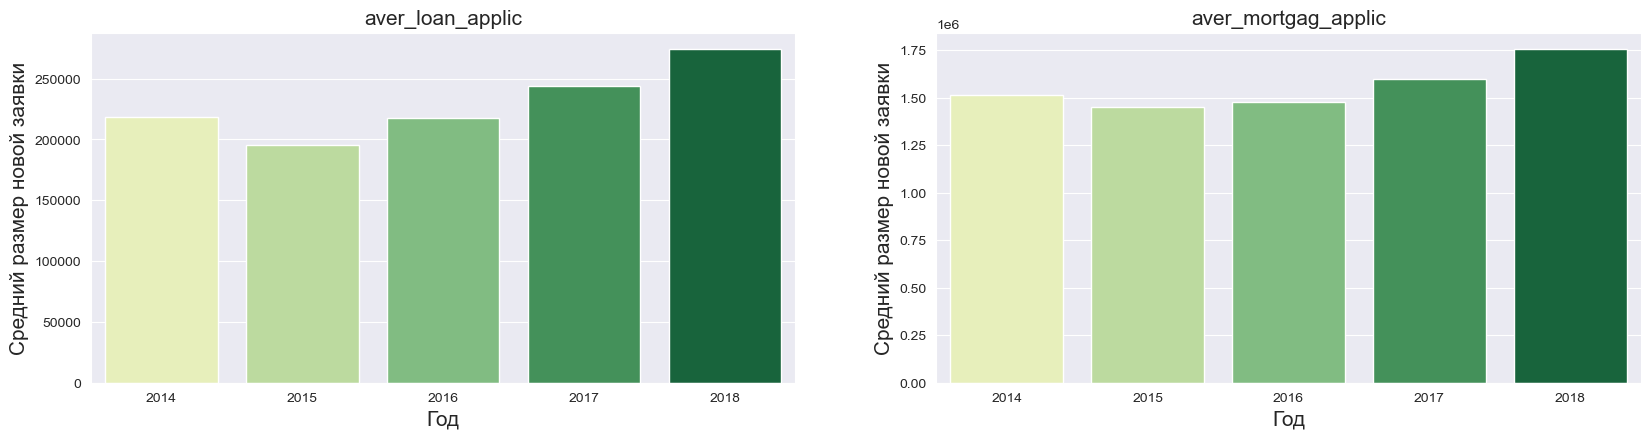

In [31]:
new_bankoper = bank_operations.columns.drop(['region', 'year', 'month', 'num_new_depos', 'aver_new_depos', 'num_loan_applic', 'num_mortgag_applic'])

for i, j in itertools.zip_longest(new_bankoper, range(len(new_bankoper))):
    plt.subplot((len(new_bankoper)), 2, j + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

    a = bank_operations.groupby(['year'])[i].agg(np.mean).to_frame().reset_index()
    sns.barplot(y = a[i], x = a['year'], palette = 'YlGn') # Greens, summer
    plt.title(i, fontsize = 15)
    plt.xlabel('Год', fontsize = 15)
    plt.ylabel('Средний размер новой заявки', fontsize = 15)
    fig = plt.gcf()
    fig.set_size_inches(20,10)

plt.show()

In [32]:
new_df = data[['region', 'year', 'Average spending on cards', 'Average salary', 'Average pension', 'On average rubles on current account per person',
               'On average, deposits in rubles per person', 'The number of applications for consumer loans', 'Average consumer loan application',
               'The number of applications for mortgages', 'The average amount of a mortgage application']]
new_df = new_df.rename(columns = {'Average spending on cards': 'aver_cards', 'Average salary': 'aver_salary', 'Average pension': 'aver_pension',
                                  'On average rubles on current account per person': 'aver_curacc_perpers', 'On average, deposits in rubles per person': 'aver_deposits_perpers',
                                  'The number of applications for consumer loans': 'num_loan_applic', 'Average consumer loan application': 'aver_loan_applic',
                                  'The number of applications for mortgages': 'num_mortgag_applic', 'The average amount of a mortgage application': 'aver_mortgag_applic', })
new_df.head(10)

name,region,year,aver_cards,aver_salary,aver_pension,aver_curacc_perpers,aver_deposits_perpers,num_loan_applic,aver_loan_applic,num_mortgag_applic,aver_mortgag_applic
12,Altai region,2014,4569,0,10557,11409,184588,11372,146725,1015,1154545
13,Altai region,2014,4242,0,10417,11737,184530,17683,153556,1452,1159874
14,Altai region,2014,5043,0,10473,11805,184391,18359,155531,1691,1101878
15,Altai region,2014,4719,0,11861,12335,186756,24797,144707,1709,1157110
16,Altai region,2014,4962,0,10092,12321,192086,22465,150149,1562,1089882
17,Altai region,2014,5124,0,10624,12934,193419,20261,145956,1940,1158206
18,Altai region,2014,5399,0,10659,12846,197063,23822,142163,1517,1084783
19,Altai region,2014,5379,0,11538,13087,200108,23278,141846,1429,1131552
20,Altai region,2014,5434,0,10660,12547,202163,20369,138890,1453,1097888
21,Altai region,2014,5424,0,10821,12522,204991,19823,137188,1481,1116874


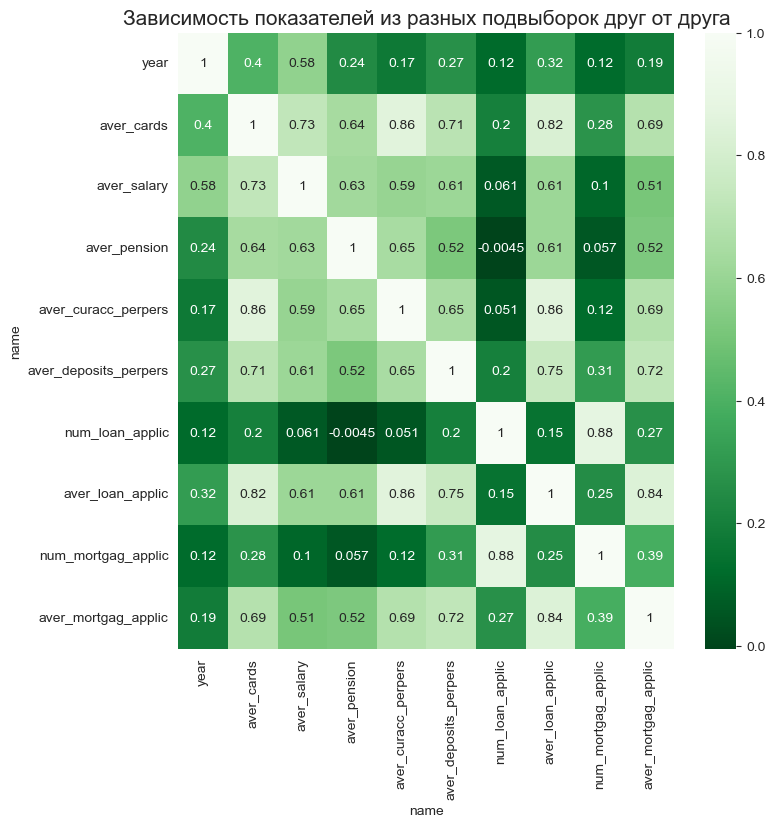

In [33]:
plt.figure(figsize = (8, 8));
plt.title('Зависимость показателей из разных подвыборок друг от друга', fontsize = 15)
sns.heatmap(new_df.corr(), annot = True, cmap = "Greens_r");

In [34]:
def corr_coeff(df, x, y):
    x_bar = df[x].mean()
    y_bar = df[y].mean()

    x_sd = df[x].std()
    y_sd = df[y].std()

    total_prod = (((df[x] - x_bar) / x_sd) * ((df[y] - y_bar) / y_sd)).sum()
    corr = total_prod / (df.shape[0] - 1)

    return corr

In [35]:
print('PCС между средними расходами по карте и средним размром кредита - ', corr_coeff(new_df, 'aver_cards', 'aver_loan_applic'))
print('PCС между средней суммой на расчетном счете на человека и средним размером кредита - ', corr_coeff(new_df, 'aver_curacc_perpers', 'aver_loan_applic'))
print('PCС между средним размером вклада на человека и средним размром кредита - ', corr_coeff(new_df, 'aver_deposits_perpers', 'aver_loan_applic'))

PCС между средними расходами по карте и средним размром кредита -  0.8201882050330398
PCС между средней суммой на расчетном счете на человека и средним размером кредита -  0.8577161489836654
PCС между средним размером вклада на человека и средним размром кредита -  0.7507191829169404
